In [1]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd
import numpy as np
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler

sns.set(style="whitegrid")
%matplotlib inline

# File upload
df = pd.read_csv('comprehensive_mutual_funds_data.csv')

In [3]:
(df.head(5))

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [4]:
print(f"{len(df)}")
print(f"{list(df.columns)}")
df = df.replace('-', np.nan).replace('', np.nan)
df.head(6)

814
['scheme_name', 'min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr', 'fund_age_yr', 'fund_manager', 'sortino', 'alpha', 'sd', 'beta', 'sharpe', 'risk_level', 'amc_name', 'rating', 'category', 'sub_category', 'returns_1yr', 'returns_3yr', 'returns_5yr']


,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7
5,Aditya Birla SL Banking&Financial Services-Dir...,1000,1000,1.17,2384.0,9,Dhaval Gala,2.07,1.24,25.53,0.96,0.97,6,Aditya Birla Sun Life Mutual Fund,2,Equity,Sectoral / Thematic Mutual Funds,5.3,24.6,9.2


In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
missing

returns_5yr      167
alpha             42
beta              42
sd                24
sharpe            23
sortino           23
returns_3yr       21
amc_name           0
returns_1yr        0
sub_category       0
category           0
rating             0
expense_ratio      0
risk_level         0
fund_size_cr       0
min_sip            0
min_lumpsum        0
fund_manager       0
fund_age_yr        0
scheme_name        0
dtype: int64

In [7]:
df_clean = df.dropna().copy()


# Convert risk and return columns to numeric (in case they are still object/string)
numeric_cols = ['sharpe', 'sortino', 'alpha', 'sd', 'beta',
                'returns_1yr', 'returns_3yr', 'returns_5yr',
                'expense_ratio', 'fund_size_cr', 'fund_age_yr']

for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Now drop any rows that might have bad values (though dropna earlier should have caught most)
df_clean = df_clean.dropna(subset=numeric_cols).reset_index(drop=True)

print(f"After final numeric conversion and cleaning: {len(df_clean)} rows")
print("\nData types after conversion:")
print(df_clean[numeric_cols].dtypes)
print("\nMissing values in numeric columns:")
print(df_clean[numeric_cols].isnull().sum())
# ReChecking to see any empty values are left.
print(df_clean.isnull().sum().sum())

print(len(df_clean))


After final numeric conversion and cleaning: 625 rows

Data types after conversion:
sharpe           float64
sortino          float64
alpha            float64
sd               float64
beta             float64
returns_1yr      float64
returns_3yr      float64
returns_5yr      float64
expense_ratio    float64
fund_size_cr     float64
fund_age_yr        int64
dtype: object

Missing values in numeric columns:
sharpe           0
sortino          0
alpha            0
sd               0
beta             0
returns_1yr      0
returns_3yr      0
returns_5yr      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
dtype: int64
0
625


In [8]:
#  Numeric financial features for clustering
feature_cols = [
    'returns_1yr', 'returns_3yr', 'rating', 'risk_level',
    'sharpe', 'sortino', 'alpha',
    'sd', 'beta',
    'expense_ratio', 'fund_size_cr', 'fund_age_yr'
]

X = df_clean[feature_cols].copy()

print(f"The Feature Columns\n")
print(feature_cols)
print(f"\nData shape for clustering: {X.shape}\n")

print(X.head())

The Feature Columns

['returns_1yr', 'returns_3yr', 'rating', 'risk_level', 'sharpe', 'sortino', 'alpha', 'sd', 'beta', 'expense_ratio', 'fund_size_cr', 'fund_age_yr']

Data shape for clustering: (625, 12)

   returns_1yr  returns_3yr  rating  risk_level  sharpe  sortino  alpha  \
0          4.0          6.5       3           3    0.24     0.32   2.24   
1          5.6          4.8       3           1    1.10     1.33   1.53   
2          2.0         18.9       3           5    1.42     3.44   2.67   
3          4.5         18.6       4           6    1.39     3.69   1.99   
4          5.3         24.6       2           6    0.97     2.07   1.24   

      sd  beta  expense_ratio  fund_size_cr  fund_age_yr  
0   9.39  0.01           0.27          10.0           10  
1   0.72  0.56           0.36        4288.0           10  
2  10.58  0.67           0.53         157.0           10  
3  10.38  0.68           0.61        6386.0           10  
4  25.53  0.96           1.17        2384.0    

In [9]:
# Standardize the features (crucial because scales vary widely)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# print("Features successfully scaled!")
# print("Mean of each feature after scaling (should be ~0):")
# print(pd.DataFrame(X_scaled, columns=feature_cols).mean().round(6))
# print("\nStandard deviation after scaling (should be 1):")
# print(pd.DataFrame(X_scaled, columns=feature_cols).std().round(6))



# For
scaler = MinMaxScaler()  # Default range [0,1]
X_scaled = scaler.fit_transform(X)




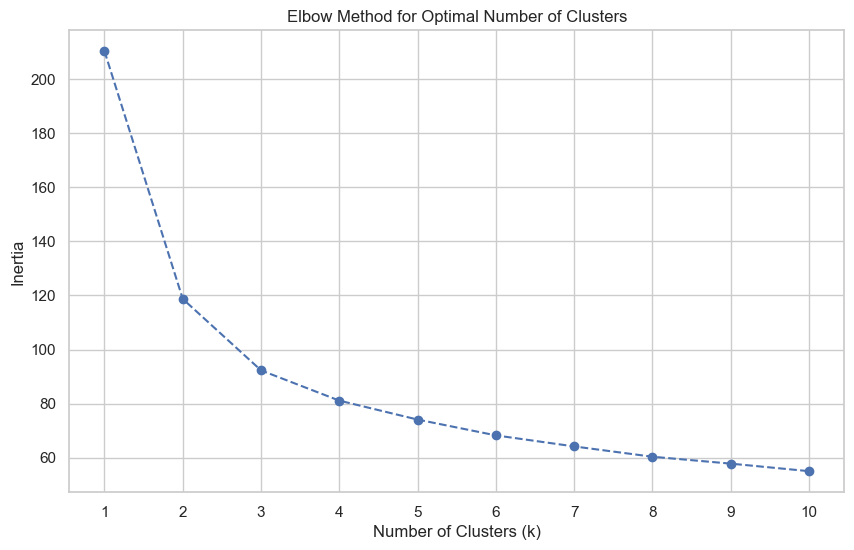

In [10]:
# Find the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()




In [93]:
# Choose k based on the elbow plot above (e.g., 4 is often good for funds)
k = 3

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the cleaned dataframe
df_clean['kmeans_cluster'] = cluster_labels

print(f"K-Means clustering completed with k={k}")
print("\nCluster distribution:")
print(df_clean['kmeans_cluster'].value_counts().sort_index())

K-Means clustering completed with k=3

Cluster distribution:
kmeans_cluster
0    262
1    159
2    204
Name: count, dtype: int64


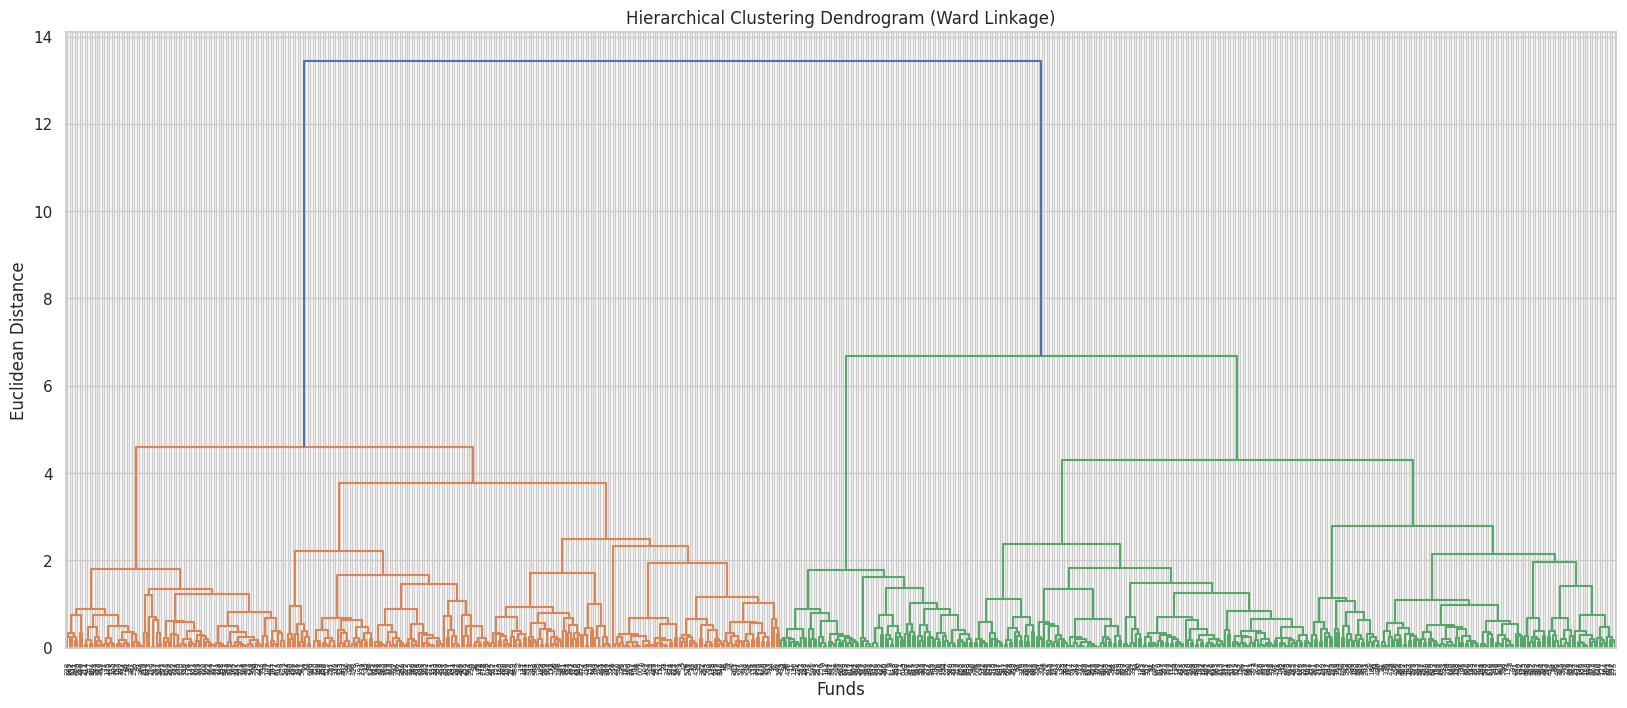

Hierarchical clustering completed.
Hierarchical cluster distribution:
hier_cluster
0    288
1    259
2     78
Name: count, dtype: int64


In [94]:
# Dendrogram for hierarchical clustering
plt.figure(figsize=(20, 8))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Funds')
plt.ylabel('Euclidean Distance')
plt.show()

# Apply Agglomerative Clustering (using same k for comparison)
hier_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
hier_labels = hier_clustering.fit_predict(X_scaled)

df_clean['hier_cluster'] = hier_labels

print("Hierarchical clustering completed.")
print("Hierarchical cluster distribution:")
print(df_clean['hier_cluster'].value_counts().sort_index())

In [95]:
# Add count and some categorical info for interpretation
cluster_summary = df_clean.groupby('kmeans_cluster').agg({
    'returns_1yr': 'mean',
    'returns_3yr': 'mean',
    'returns_5yr': 'mean',
    'sharpe': 'mean',
    'sortino': 'mean',
    'alpha': 'mean',
    'sd': 'mean',
    'beta': 'mean',
    'expense_ratio': 'mean',
    'fund_size_cr': 'mean',
    'fund_age_yr': 'mean',
    'rating': 'mean',
    'category': lambda x: x.value_counts().index[0],  # Most common category
    'sub_category': lambda x: x.value_counts().index[0]  # Most common sub-category
}).round(3)

cluster_summary['fund_count'] = df_clean['kmeans_cluster'].value_counts().sort_index()

print("Cluster Interpretation Summary (K-Means):")
print(cluster_summary)

Cluster Interpretation Summary (K-Means):
                returns_1yr  returns_3yr  returns_5yr  sharpe  sortino  alpha  \
kmeans_cluster                                                                  
0                     4.993        7.161        6.494   1.029    2.381  2.282   
1                     1.560       25.958       10.280   1.335    2.832  2.018   
2                     5.370       27.916       12.582   1.474    3.227  3.615   

                    sd   beta  expense_ratio  fund_size_cr  fund_age_yr  \
kmeans_cluster                                                            
0                2.526  0.868           0.44      4374.995        9.630   
1               15.837  0.839           1.14      2392.158        9.321   
2               15.565  0.710           0.84      6398.196        9.490   

                rating category                      sub_category  fund_count  
kmeans_cluster                                                                 
0               

In [92]:
# Import for supervised models
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_validate, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import pandas as pd

# Create target: 1 for Equity, 0 otherwise
df_clean['label_y'] = (df_clean['category'] == 'Equity').astype(int)

print("Class distribution:")
print(df_clean['label_y'].value_counts(normalize=True))

# Features (same as clustering)
feature_cols = [
    'returns_1yr', 'returns_3yr', 'rating', 'risk_level',
    'sharpe', 'sortino', 'alpha',
    'sd', 'beta',
    'expense_ratio', 'fund_size_cr', 'fund_age_yr'
]
X = df_clean[feature_cols]
y = df_clean['label_y']


cv = KFold(n_splits=4, shuffle=True, random_state=42)
# Scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 1. Gaussian Naive Bayes
nb_model = make_pipeline(StandardScaler(), GaussianNB())
nb_scores = cross_validate(nb_model, X, y, cv=cv, scoring=scoring)
print("\nGaussian Naive Bayes ({cv.n_splits}-fold CV):")
print(pd.DataFrame(nb_scores)[[ 'test_accuracy', 'test_precision', 'test_recall', 'test_f1' ]].mean().round(3))

# 2. Neural Network (MLP)
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100,), max_iter=2000, random_state=42, early_stopping=True, tol= 1e-4))
mlp_scores = cross_validate(mlp_model, X, y, cv=cv, scoring=scoring)
print("\nNeural Network (MLP):")
print(pd.DataFrame(mlp_scores)[[ 'test_accuracy', 'test_precision', 'test_recall', 'test_f1' ]].mean().round(3))

# 3. Logistic Regression (Linear Model)
lr_model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
lr_scores = cross_validate(lr_model, X, y, cv=cv, scoring=scoring)
print("\nLogistic Regression (Linear Model):")
print(pd.DataFrame(lr_scores)[[ 'test_accuracy', 'test_precision', 'test_recall', 'test_f1' ]].mean().round(3))


# 4. Perceptron
perc_model = make_pipeline(StandardScaler(), Perceptron(random_state=42, max_iter=1000))
perc_scores = cross_validate(perc_model, X, y, cv=cv, scoring=scoring)
print("\nPerceptron average metrics:")
print(pd.DataFrame(perc_scores)[['test_accuracy', 'test_precision', 'test_recall', 'test_f1']].mean().round(3))

# 5. SVM Model
svm_model = make_pipeline(StandardScaler(), SVC(random_state=42))
svm_scores = cross_validate(svm_model, X, y, cv=cv, scoring=scoring)
print("\nSupport Vector Machine (SVM):")
print(pd.DataFrame(svm_scores)[[ 'test_accuracy', 'test_precision', 'test_recall', 'test_f1' ]].mean().round(3))

Class distribution:
label_y
0    0.5968
1    0.4032
Name: proportion, dtype: float64

Gaussian Naive Bayes ({cv.n_splits}-fold CV):
test_accuracy     0.886
test_precision    0.790
test_recall       0.979
test_f1           0.875
dtype: float64

Neural Network (MLP):
test_accuracy     0.906
test_precision    0.839
test_recall       0.951
test_f1           0.891
dtype: float64

Logistic Regression (Linear Model):
test_accuracy     0.930
test_precision    0.879
test_recall       0.954
test_f1           0.915
dtype: float64

Perceptron average metrics:
test_accuracy     0.904
test_precision    0.889
test_recall       0.873
test_f1           0.878
dtype: float64

Support Vector Machine (SVM):
test_accuracy     0.941
test_precision    0.882
test_recall       0.983
test_f1           0.930
dtype: float64
